![image-2.png](attachment:image-2.png)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Sources : https://www.kaggle.com/datasets/andrewmvd/leukemia-classification/data


Data set is already splite into three folder which contain tesing_data, training_data and validation_data

In this data set there are already lableded with hem and all
hem : normal hematopoietic cell which repersent a normal healty cell
all : Acute Lymphoblastic Leukemia (ALL) which represent a blast cell

![image.png](attachment:image.png)

in each fopl

https://www.kaggle.com/code/ashish2001/leukemia-detection-using-efficient-net-b3

In [ ]:
# ! pip install torchvision

In [ ]:
import torch
import pandas as pd
import glob
import os
import os.path as op
import shutil
# from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import pytorch_lightning as pl


from torchvision import datasets, models, transforms
import torchvision.transforms as T
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

In [ ]:
# import os

# def get_subfolders(folder_path):
#     subfolders = [f.path for f in os.scandir(folder_path) if f.is_dir()]
#     return subfolders

# # Example usage:
# folder_path = 'C-NMC_Leukemia'
# subfolders = get_subfolders(folder_path)

# print("Subfolders:")
# for subfolder in subfolders:
#     print(subfolder)

In [ ]:
import os

def find_deepest_paths(folder_path):
    max_depth = 0
    deepest_paths = []

    for root, dirs, files in os.walk(folder_path):
        # Calculate the depth of the current path
        current_depth = root.count(os.sep)

        # Check if it's deeper than the previous maximum
        if current_depth > max_depth:
            max_depth = current_depth
            deepest_paths = [root.replace('\\', '/')]
        elif current_depth == max_depth:
            deepest_paths.append(root.replace('\\', '/'))

    return deepest_paths

# Example usage:
folder_path = 'C-NMC_Leukemia/training_data'
deepest_paths = find_deepest_paths(folder_path)

print("Deepest Paths:")
for path in deepest_paths:
    print(path)

Deepest Paths:
C-NMC_Leukemia/training_data/fold_0/all
C-NMC_Leukemia/training_data/fold_0/hem
C-NMC_Leukemia/training_data/fold_1/all
C-NMC_Leukemia/training_data/fold_1/hem
C-NMC_Leukemia/training_data/fold_2/all
C-NMC_Leukemia/training_data/fold_2/hem


In [ ]:

def create_glob_patterns(file_paths):
    all_list = []
    hem_list = []

    for path in file_paths:
        _, _, fold, category = path.split('/')
        glob_pattern = f"{path}/*.bmp"
        paths_for_category = glob.glob(glob_pattern)

        if 'all' in path:
            all_list.extend(paths_for_category)
        elif 'hem' in path:
            hem_list.extend(paths_for_category)

    return all_list, hem_list


all_list, hem_list = create_glob_patterns(deepest_paths)

# Print the results
print("All List:", len(all_list))
print("Hem List:",len( hem_list))

All List: 7272
Hem List: 3389


In [ ]:
valid_data=pd.read_csv( 'C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data_labels.csv')
all_v = valid_data[valid_data['labels']==1]
hem_v = valid_data[valid_data['labels']==0]
all_v_list = ['C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data/' + i for i in list(all_v.new_names) ]
hem_v_list = ['C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data/' + i for i in list(hem_v.new_names) ]

In [ ]:
print(all_v_list)

['C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data/1.bmp', 'C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data/2.bmp', 'C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data/3.bmp', 'C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data/5.bmp', 'C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data/6.bmp', 'C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data/9.bmp', 'C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data/10.bmp', 'C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data/11.bmp', 'C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data/12.bmp', 'C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data/15.bmp', 'C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data/16.bmp', 'C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data/17.bmp', 'C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data/18.bmp', 'C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data/19.bmp', 'C-NMC_Leukemia/validatio

In [ ]:
# Merge all data into one data path list
all_list.extend(all_v_list)
hem_list.extend(hem_v_list)
print("All List:", len(all_list))
print("Hem List:",len( hem_list))

All List: 8491
Hem List: 4037


In [ ]:
df_all = pd.DataFrame({'path' : all_list, 'label':1})
df_hem = pd.DataFrame({'path': hem_list, 'label' : 0})
df_hem.head()
# merge to set of data into one pandas dataframe


,path,label
0,C-NMC_Leukemia/training_data/fold_0/hem\UID_H1...,0
1,C-NMC_Leukemia/training_data/fold_0/hem\UID_H1...,0
2,C-NMC_Leukemia/training_data/fold_0/hem\UID_H1...,0
3,C-NMC_Leukemia/training_data/fold_0/hem\UID_H1...,0
4,C-NMC_Leukemia/training_data/fold_0/hem\UID_H1...,0


In [ ]:
# Concatenate dataframes along rows (axis=0)
df = pd.concat([df_all, df_hem], ignore_index=True)

# Display the concatenated dataframe
print(df)

                                                    path  label
0      C-NMC_Leukemia/training_data/fold_0/all\UID_11...      1
1      C-NMC_Leukemia/training_data/fold_0/all\UID_11...      1
2      C-NMC_Leukemia/training_data/fold_0/all\UID_11...      1
3      C-NMC_Leukemia/training_data/fold_0/all\UID_11...      1
4      C-NMC_Leukemia/training_data/fold_0/all\UID_11...      1
...                                                  ...    ...
12523  C-NMC_Leukemia/validation_data/C-NMC_test_prel...      0
12524  C-NMC_Leukemia/validation_data/C-NMC_test_prel...      0
12525  C-NMC_Leukemia/validation_data/C-NMC_test_prel...      0
12526  C-NMC_Leukemia/validation_data/C-NMC_test_prel...      0
12527  C-NMC_Leukemia/validation_data/C-NMC_test_prel...      0

[12528 rows x 2 columns]


In [ ]:
df['path'] = df['path'].str.replace('\\', '/', regex=False)
print(df)

                                                    path  label
0      C-NMC_Leukemia/training_data/fold_0/all/UID_11...      1
1      C-NMC_Leukemia/training_data/fold_0/all/UID_11...      1
2      C-NMC_Leukemia/training_data/fold_0/all/UID_11...      1
3      C-NMC_Leukemia/training_data/fold_0/all/UID_11...      1
4      C-NMC_Leukemia/training_data/fold_0/all/UID_11...      1
...                                                  ...    ...
12523  C-NMC_Leukemia/validation_data/C-NMC_test_prel...      0
12524  C-NMC_Leukemia/validation_data/C-NMC_test_prel...      0
12525  C-NMC_Leukemia/validation_data/C-NMC_test_prel...      0
12526  C-NMC_Leukemia/validation_data/C-NMC_test_prel...      0
12527  C-NMC_Leukemia/validation_data/C-NMC_test_prel...      0

[12528 rows x 2 columns]


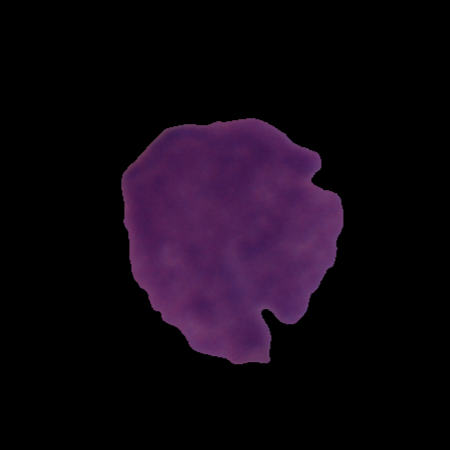

In [ ]:
from PIL import Image

# Example image file path
image_path = df.path[0]

# Open the image
Image.open(image_path)

# Display the image (optional)
# image.show()


In [ ]:

# Set a seed for reproducibility
seed = 42

# Shuffle the DataFrame with the specified seed
shuffled_df = df.sample(frac=1, random_state=seed).reset_index(drop=True)

# Display the shuffled DataFrame
print(shuffled_df)

                                                    path  label
0      C-NMC_Leukemia/validation_data/C-NMC_test_prel...      1
1      C-NMC_Leukemia/training_data/fold_1/all/UID_44...      1
2      C-NMC_Leukemia/training_data/fold_2/all/UID_49...      1
3      C-NMC_Leukemia/training_data/fold_2/all/UID_47...      1
4      C-NMC_Leukemia/training_data/fold_1/all/UID_51...      1
...                                                  ...    ...
12523  C-NMC_Leukemia/validation_data/C-NMC_test_prel...      0
12524  C-NMC_Leukemia/training_data/fold_2/all/UID_24...      1
12525  C-NMC_Leukemia/training_data/fold_2/all/UID_25...      1
12526  C-NMC_Leukemia/training_data/fold_0/all/UID_35...      1
12527  C-NMC_Leukemia/training_data/fold_2/all/UID_78...      1

[12528 rows x 2 columns]


In [ ]:
print("path are " + df['path'][0])
shuffled_df['id'] = shuffled_df['path'].apply(lambda x: x.split('/')[-1].split('.')[0])
shuffled_df

path are C-NMC_Leukemia/training_data/fold_0/all/UID_11_10_1_all.bmp


,path,label,id
0,C-NMC_Leukemia/validation_data/C-NMC_test_prel...,1,338
1,C-NMC_Leukemia/training_data/fold_1/all/UID_44...,1,UID_44_22_4_all
2,C-NMC_Leukemia/training_data/fold_2/all/UID_49...,1,UID_49_19_5_all
3,C-NMC_Leukemia/training_data/fold_2/all/UID_47...,1,UID_47_33_1_all
4,C-NMC_Leukemia/training_data/fold_1/all/UID_51...,1,UID_51_82_2_all
...,...,...,...
12523,C-NMC_Leukemia/validation_data/C-NMC_test_prel...,0,233
12524,C-NMC_Leukemia/training_data/fold_2/all/UID_24...,1,UID_24_5_3_all
12525,C-NMC_Leukemia/training_data/fold_2/all/UID_25...,1,UID_25_9_1_all
12526,C-NMC_Leukemia/training_data/fold_0/all/UID_35...,1,UID_35_3_4_all


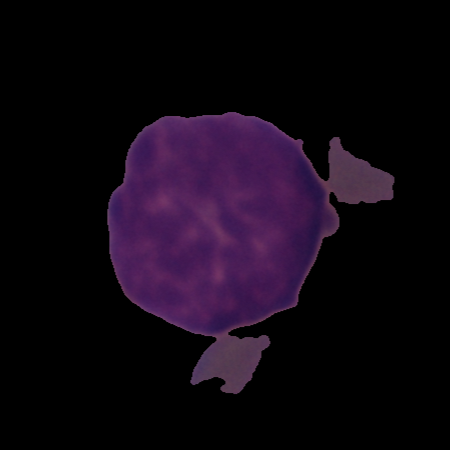

In [ ]:
image_path = shuffled_df.path[3]

# Open the image
Image.open(image_path)

In [ ]:
train_df, test_df = train_test_split(shuffled_df, test_size=0.2, random_state=42)


In [ ]:
train_df, validation_df = train_test_split(train_df, test_size=0.2, random_state=42)


In [ ]:
print("Length of training set = {}, validation set = {} and testing set = {}".format(len(train_df), len(validation_df),len(test_df)))

Length of training set = 8017, validation set = 2005 and testing set = 2506


In [ ]:
train_df

,path,label,id
1071,C-NMC_Leukemia/training_data/fold_2/all/UID_67...,1,UID_67_14_11_all
9014,C-NMC_Leukemia/training_data/fold_0/all/UID_52...,1,UID_52_24_9_all
12,C-NMC_Leukemia/training_data/fold_2/all/UID_67...,1,UID_67_3_4_all
10159,C-NMC_Leukemia/training_data/fold_0/all/UID_45...,1,UID_45_18_3_all
1765,C-NMC_Leukemia/training_data/fold_0/all/UID_48...,1,UID_48_27_5_all
...,...,...,...
5660,C-NMC_Leukemia/training_data/fold_0/all/UID_4_...,1,UID_4_15_2_all
183,C-NMC_Leukemia/training_data/fold_0/all/UID_50...,1,UID_50_7_6_all
5715,C-NMC_Leukemia/training_data/fold_0/all/UID_45...,1,UID_45_34_7_all
12173,C-NMC_Leukemia/training_data/fold_1/hem/UID_H2...,0,UID_H22_35_1_hem


In [ ]:
# # Split the DataFrame into features and labels
# features = shuffled_df['path']
# labels = shuffled_df['label']
# # Split the data into training, validation, and test sets
# train_features, test_features, train_labels, test_labels = train_test_split(
#     features, labels, test_size=0.2, random_state=42
# )

# # Further split the training data into training and validation sets
# train_features, val_features, train_labels, val_labels = train_test_split(
#     train_features, train_labels, test_size=0.2, random_state=42
# )

In [ ]:
# Assuming you have three DataFrames: train_df, validation_df, and test_df

root_dir = "data/bloodcell/"

# Iterate over each DataFrame and its corresponding folder name
for df, folder_name in zip([train_df, validation_df, test_df], ["train", "validation", "test"]):
    for _, r in df.iterrows():
        # Determine the subfolder based on the label value
        subfolder = "hem" if r.label == 0 else "all"

        # Create subfolder if it doesn't exist
        d = op.join(root_dir, folder_name, subfolder)
        if not op.exists(d):
            os.makedirs(d)

        # Check if the file already exists in the destination
        destination_path = op.join(d, f"{r.id}.jpg")
        if not op.exists(destination_path):
            # Copy the image to the appropriate subfolder with a new filename
            shutil.copy(r.path, destination_path)

In [ ]:
# Assuming you have three DataFrames: train_df, validation_df, and test_df

root_dir = "data/bloodcell/"

# Iterate over each DataFrame and its corresponding folder name
for df, folder_name in zip([train_df, validation_df, test_df], ["train", "validation", "test"]):
    for _, r in df.iterrows():
        # Determine the subfolder based on the label value
        subfolder = "hem" if r.label == 0 else "all"

        # Create subfolder if it doesn't exist
        d = op.join(root_dir, folder_name, subfolder)
        if not op.exists(d):
            os.makedirs(d)

        # Check if the file already exists in the destination
        destination_path = op.join(d, f"{r.id}.jpg")
        if not op.exists(destination_path):
            # Copy the image to the appropriate subfolder with a new filename
            shutil.copy(r.path, destination_path)

# Print the number of files in 'hem' and 'all' subfolders for each dataset
def print_folder_counts(root_dir, dataset_names=["train", "validation", "test"]):
    for folder_name in dataset_names:
        hem_folder = op.join(root_dir, folder_name, "hem")
        all_folder = op.join(root_dir, folder_name, "all")

        hem_count = len(os.listdir(hem_folder))
        all_count = len(os.listdir(all_folder))

        print(f"For {folder_name} dataset:")
        print(f"Number of files in 'hem' folder: {hem_count}")
        print(f"Number of files in 'all' folder: {all_count}")
        print("=" * 30)

root_directory = "data/bloodcell/"
print_folder_counts(root_directory)

For train dataset:
Number of files in 'hem' folder: 2573
Number of files in 'all' folder: 5444
For validation dataset:
Number of files in 'hem' folder: 665
Number of files in 'all' folder: 1340
For test dataset:
Number of files in 'hem' folder: 799
Number of files in 'all' folder: 1707


# Image classfification with Pytorch

In [ ]:
train_df

,path,label,id
1071,C-NMC_Leukemia/training_data/fold_2/all/UID_67...,1,UID_67_14_11_all
9014,C-NMC_Leukemia/training_data/fold_0/all/UID_52...,1,UID_52_24_9_all
12,C-NMC_Leukemia/training_data/fold_2/all/UID_67...,1,UID_67_3_4_all
10159,C-NMC_Leukemia/training_data/fold_0/all/UID_45...,1,UID_45_18_3_all
1765,C-NMC_Leukemia/training_data/fold_0/all/UID_48...,1,UID_48_27_5_all
...,...,...,...
5660,C-NMC_Leukemia/training_data/fold_0/all/UID_4_...,1,UID_4_15_2_all
183,C-NMC_Leukemia/training_data/fold_0/all/UID_50...,1,UID_50_7_6_all
5715,C-NMC_Leukemia/training_data/fold_0/all/UID_45...,1,UID_45_34_7_all
12173,C-NMC_Leukemia/training_data/fold_1/hem/UID_H2...,0,UID_H22_35_1_hem


In [ ]:

train_transform = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])



In [ ]:
train_data = datasets.ImageFolder("data/bloodcell/train",transform=train_transform)
val_data = datasets.ImageFolder("data/bloodcell/validation")

In [ ]:
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32,shuffle=False)

In [ ]:
n_train = len(train_loader.dataset)
n_val = len(val_loader.dataset)

In [ ]:
n_train, n_val

(8017, 2005)

In [ ]:

root_directory = "data/bloodcell/"
print_folder_counts(root_directory)

For train dataset:
Number of files in 'hem' folder: 2573
Number of files in 'all' folder: 5444
For validation dataset:
Number of files in 'hem' folder: 665
Number of files in 'all' folder: 1340
For test dataset:
Number of files in 'hem' folder: 799
Number of files in 'all' folder: 1707


In [ ]:
# example of 1 batch
images, labels = next(iter(train_loader))

In [ ]:
images.shape, labels.shape

(torch.Size([32, 3, 450, 450]), torch.Size([32]))

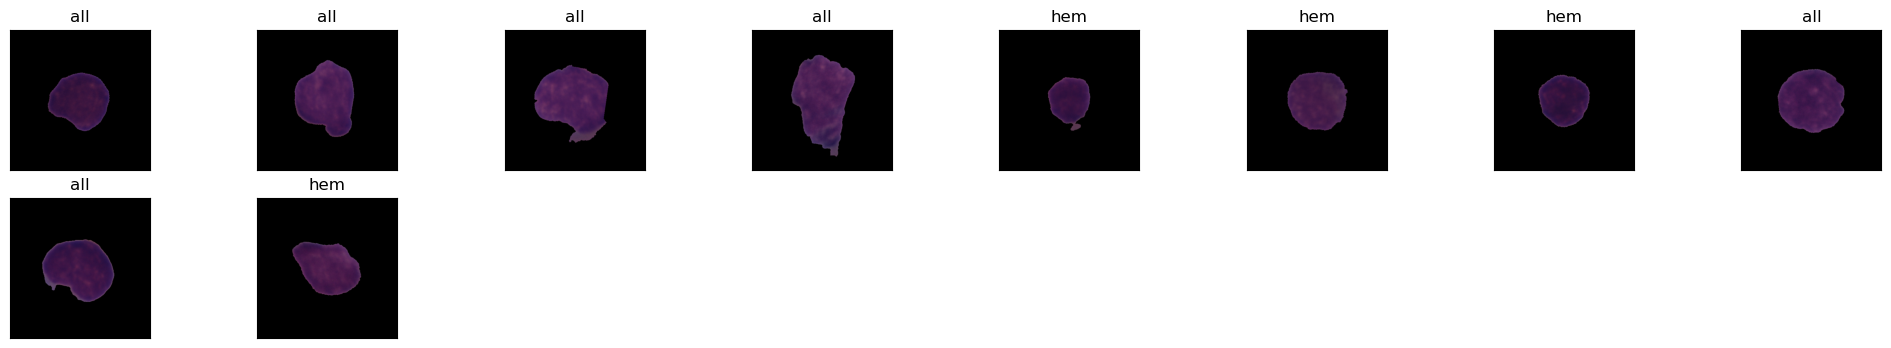

In [ ]:
idx2_class = {v: k for k, v in train_data.class_to_idx.items()}
fig = plt.figure(figsize=(25, 4))  # Fix the typo in 'figzise'
for i in range(10):
    image = np.transpose(images.cpu()[i].numpy(), (1, 2, 0))  # Fix the transpose and add .numpy()
    label = idx2_class[labels.cpu().tolist()[i]]
    ax = fig.add_subplot(2, 8, i + 1, xticks=[], yticks=[])  # Fix the subplot dimensions
    plt.imshow(image)
    ax.set_title(label)


In [ ]:
# create pretained model
model =  models.resnet34(pretrained=True)
for param in model.parameters():
        param.requires_grad=False

C:\Users\USER\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
model

In [ ]:
import torch.nn as nn
model.fc = nn.Linear(in_features=512, out_features=len(train_data.classes))

In [ ]:
cross_entropy = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=2e-3)

In [ ]:
gpu = torch.cuda.is_available()
print("GPU available:", gpu)

if gpu:
    device = torch.device("cuda")
    model.to(device)
    print("Model moved to GPU:", torch.cuda.get_device_name(torch.cuda.current_device()))


GPU available: False


In [ ]:
n_epochs = 30
for epoch in range(n_epochs):
    # ช่วง train
    model.train()
    train_loss, val_loss = 0, 0
    for images, labels in tqdm(train_loader):
        if gpu:
            images, labels = images.cuda(), labels.cuda()
        optimizer.zero_grad()
        pred = model(images) # คำนวณหา output (pred) จาก โมเดลที่มีอยู่
        loss = cross_entropy(pred, labels)
        loss.backward() # คำนวณ gradient จาก loss ที่ได้
        optimizer.step() # อัพเดทพารามิเตอร์ของโมเดล
        train_loss += loss.item() * images.size(0)

    # ช่วง validate
    model.eval() # เซ็ตเป็น evaluation mode
    for images, labels in tqdm(val_loader):
        if gpu:
            images, labels = images.cuda(), labels.cuda()
        pred = model(images)
        loss = cross_entropy(pred, labels)
        val_loss += loss.item() * images.size(0)
    print("Training loss = {}, Validation loss = {}".format(train_loss / n_train, val_loss / n_val))

In [ ]:
gpu_available = torch.cuda.is_available()
print("GPU available:", gpu_available)

In [ ]:
torch.cuda.is_available()

use GPU to train for better performence
https://www.youtube.com/watch?v=StH5YNrY0mE&t=39s / https://www.youtube.com/watch?v=K8qs9GlE4UQ

https://www.youtube.com/watch?v=h7hhfmFJj2c

Pytorch lighling

In [ ]:
# !pip install pytorch_lightning

In [ ]:
import torch
import torch.nn as nn
import pytorch_lightning as pl
from torchmetrics import Accuracy
from pytorch_lightning.callbacks import ModelCheckpoint
from torchmetrics.classification import Accuracy

In [ ]:

train_transform = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])

val_transform = transforms.Compose([
    transforms.ToTensor()
])


In [ ]:

train_transform = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])

val_transform = transforms.Compose([
    transforms.ToTensor()
])

train_data = datasets.ImageFolder("data/bloodcell/train",transform=train_transform)
val_data = datasets.ImageFolder("data/bloodcell/validation",transform=val_transform)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)

In [ ]:
# Check the first few items in your dataset
for i in range(10):
    item = train_data[i]
    print(item)

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), 0)
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0.

In [ ]:
classes = train_data.classes
n_classes = len(classes)

In [ ]:
class LeukemiaResNet(pl.LightningModule):
    def __init__(self, n_classes=2):
        super(LeukemiaResNet, self).__init__()

        # จำนวนของพันธุ์น้องหมา (120)
        self.n_classes = n_classes

        # ใช้สถาปัตยกรรม resnet34; เปลี่ยน layer สุดท้าย
        self.backbone = models.resnet34(pretrained=True)
        for param in self.backbone.parameters():
            param.requires_grad = False
        # เปลี่ยน fc layer เป็น output ขนาด 120
        self.backbone.fc = torch.nn.Linear(self.backbone.fc.in_features, n_classes)

        self.entropy_loss = nn.CrossEntropyLoss()
        self.accuracy = Accuracy(task='binary')

    def forward(self, x):
        preds = self.backbone(x)
        return pred

    def training_step(self, batch, batch_idx):
        x, y = batch
        logits = self.backbone(x)
        loss = self.entropy_loss(logits, y)
        y_pred = torch.argmax(logits, dim=1)
        self.log("train_loss", loss)
        self.log("train_acc", self.accuracy(y_pred, y))
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        logits = self.backbone(x)
        loss = self.entropy_loss(logits, y)
        y_pred = torch.argmax(logits, dim=1)
        self.log("val_loss", loss)
        self.log("val_acc", self.accuracy(y_pred, y))
        return loss

    def configure_optimizers(self):
        self.optimizer = torch.optim.AdamW(self.parameters(), lr=1e-3)
        return {
            "optimizer": self.optimizer,
            "monitor": "val_loss",
        }

In [ ]:
model =LeukemiaResNet(n_classes=n_classes)

In [ ]:
print(train_loader)

In [ ]:
checkpoint_callback = ModelCheckpoint(
   dirpath="./checkpoints/dogbreed/",
   filename="resnet18--{epoch:02d}-{val_acc:.2f}-{val_loss:.2f}",
   save_top_k=1,
   verbose=True,
   monitor="val_loss",
   mode="min",
)

In [ ]:
trainer = pl.Trainer(max_epochs=2,  callbacks=[checkpoint_callback])
trainer.fit(model, train_dataloaders=train_loader, val_dataloaders=val_loader)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name         | Type             | Params
--------------------------------------------------
0 | backbone     | ResNet           | 21.3 M
1 | entropy_loss | CrossEntropyLoss | 0     
2 | accuracy     | BinaryAccuracy   | 0     
--------------------------------------------------
1.0 K     Trainable params
21.3 M    Non-trainable params
21.3 M    Total params
85.143    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

C:\Users\USER\anaconda3\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 0, global step 251: 'val_loss' reached 0.59492 (best 0.59492), saving model to 'C:\\Users\\USER\\BU Deeplearning\\checkpoints\\dogbreed\\resnet18--epoch=00-val_acc=0.71-val_loss=0.59.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 1, global step 502: 'val_loss' was not in top 1
`Trainer.fit` stopped: `max_epochs=2` reached.
